# Иследование компьютерных игр
<div class="alert alert-info"><b> В нашем распоряжении данные из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

 Необходимо проанализировать игры, найти закономерности или отсуствие взаимосвязи от различных факторов (жанра, рейтинга, платформы, оценки и т.д.). Сформулировать и предоставить выводы.
<b>
</div>  

### Откройте файл с данными и изучите общую информацию.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [ ]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
# импортируем библиотеку и читаем файл

In [ ]:
plt.style.use('seaborn')
params = {
          'axes.titlesize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'axes.labelsize': 16
          }
plt.rcParams.update(params)

<div class="alert alert-info"><b>
Обработка явных дубликатов
<b>
</div>

In [ ]:
data.duplicated().sum() # дубликатов не найдено

0

In [ ]:
data.head(10) # изучаем информацию в датасете

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [ ]:
data.info() # изучаем информацию в датасете по столбцам, сразу отмечу в датасете в нескольких столбцах присутствует много пропусков

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


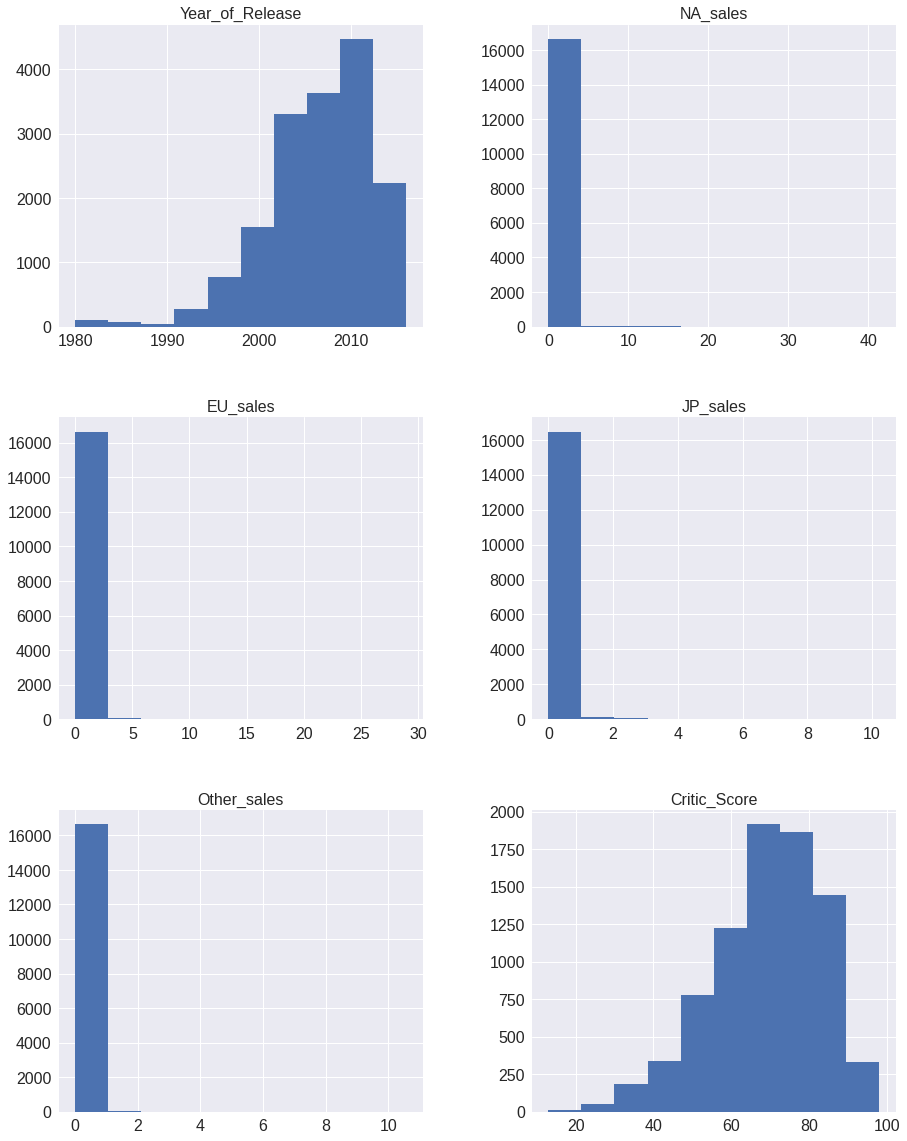

In [ ]:
data.hist(bins=10, figsize=(15, 20));

### Предобработка данных

#### Замена названия столбцов (приведение к нижнему регистру)

In [ ]:
data.columns = data.columns.str.lower()
# переменовываем столбцы

#### Преобразование данные в нужные типы и Обработка пропусков

Преобразовать нужно, столбцы year_of_release, critic_score, user_score. В - первом случае, года подрузумевают целочисленные значения. Во - втором у нас оценка идет от 0 до 100 целочисленная оценка, без дробей. В - третьем случае, у нас оценка пользователя величина от 0 до 10 числовая, а не строковая. Для того чтобы преобразовать необходимо обработать пропуски.

In [ ]:
data.isna().sum() # Выведем количество пропущенных значений для каждого столбца

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [ ]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6),  legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось')

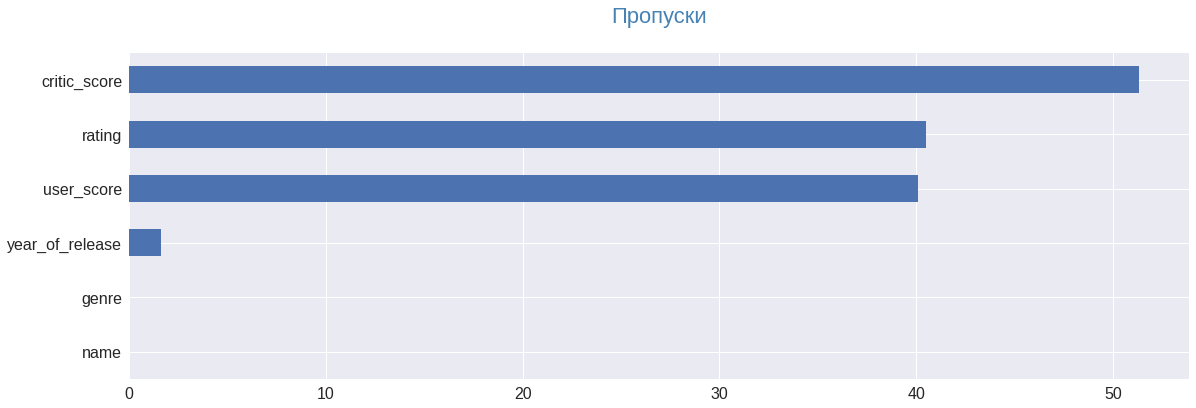

In [ ]:
pass_value_barh(data)

`name`, `year_of_release` и `genre` В этих столбац мало пропусков поэтому мы их удалим. Причина пропусков техническая ошибка либо отсутсвие данных.

In [ ]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

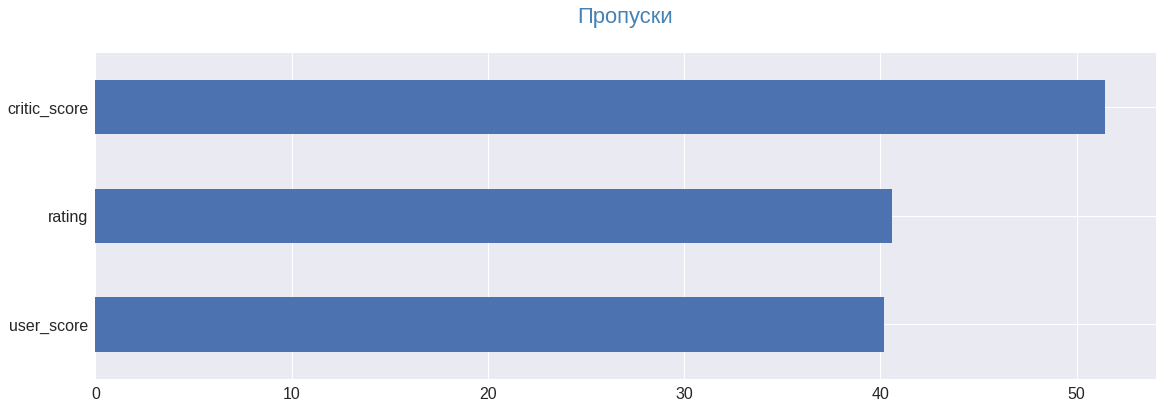

In [ ]:
pass_value_barh(data) # проверка, от пропусков избавились

In [ ]:
data['year_of_release'] = data['year_of_release'].astype('int64') # преобразовываем в нужный нам тип данных

In [ ]:
data['critic_score'].unique() # проверка уникальных значений

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [ ]:
data['critic_score'] = data['critic_score'].fillna(value=0) # заполняем пропуски нулями
data['user_score'] = data['user_score'].fillna(value=-1) # заполняем пропуски -1
data['rating'] = data['rating'].fillna(value='Без рейтинга')

##### Обработка значения 'tbd' в столбце с оценкой пользователей

Значение 'tbd' в столбце оценка пользователей по сути и говорит об отсутствие данных и поэтому будет коректно заменить значение -1.

In [ ]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1 # применяем фильтр и заменяем значения

In [ ]:
data['user_score'] = data['user_score'].astype('float64') # преобразовываем значения в нужный тип

пропусков не осталось


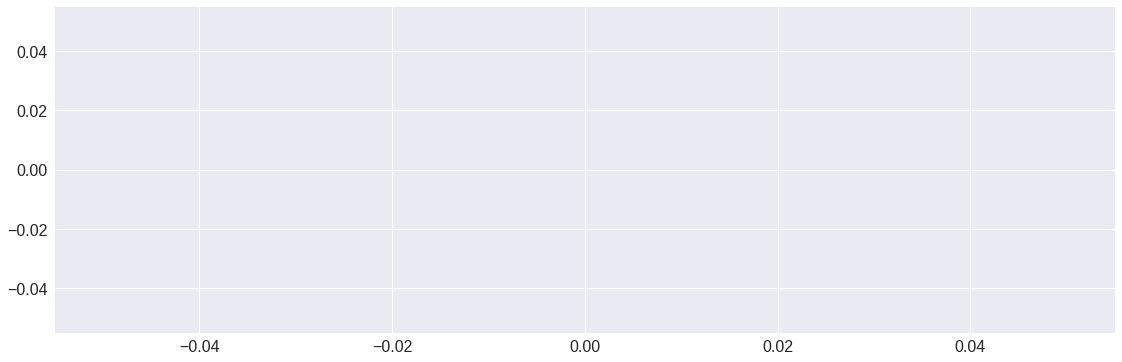

In [ ]:
pass_value_barh(data); #  проверяем, пропусков  не осталось.

В остальных столбцах, пропуски заполним нулями, а в рейтинге создадим группу игр без рейтинга. Причина пропусков отсутсвие данных или человеческих фактор.

#### Посчёт суммарных продаж по всем регионам.

In [ ]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,-1.0,Без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,-1.0,Без рейтинга,31.38


### Проведите исследовательский анализ данных

#### Анализ игр по годам.

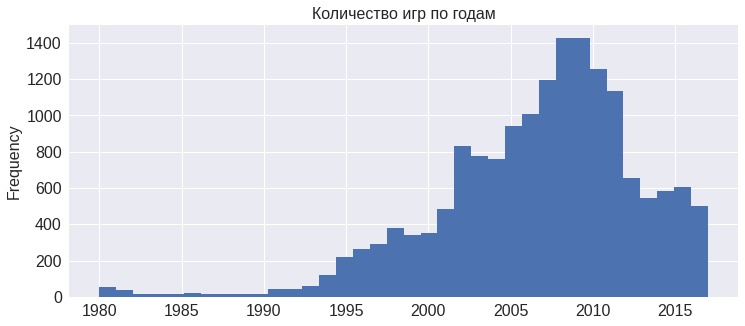

In [ ]:
data.year_of_release.plot(
    kind='hist',
    bins=36,
    range=(1980, 2017),
    grid=True,
    title='Количество игр по годам',
    figsize=(12,5),
    ylabel('Количество'););


Данные за ранние года важны помогает понять, когда начался рост индустрии. В принципе в ранние годы можно считать выбросами данных, ибо количество игр по сравнению началом 2000 невелико

#### Распределение общего количества продаж топ платформ по годам

In [ ]:
(
data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
) # Выведим топ 10 платформ по общему заработку за все время.

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


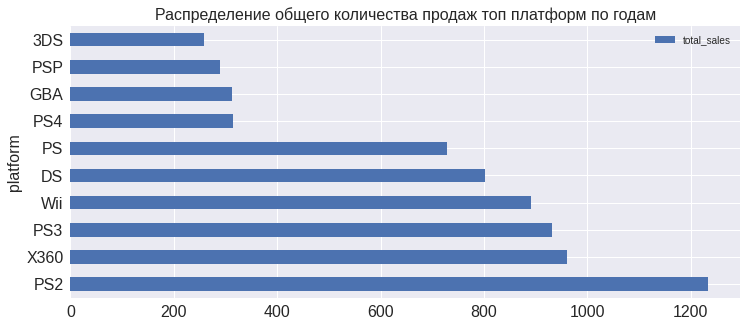

In [ ]:
(
data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
    .plot(kind='barh', title='Распределение общего количества продаж топ платформ по годам', grid=True, figsize=(12,5),
          xlabel='Количество', ylabel='Платформы')
);
# добавил график

In [ ]:
top_10 = (
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
    .index
    .unique()
)
# возьмем названия компаний
top_10

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

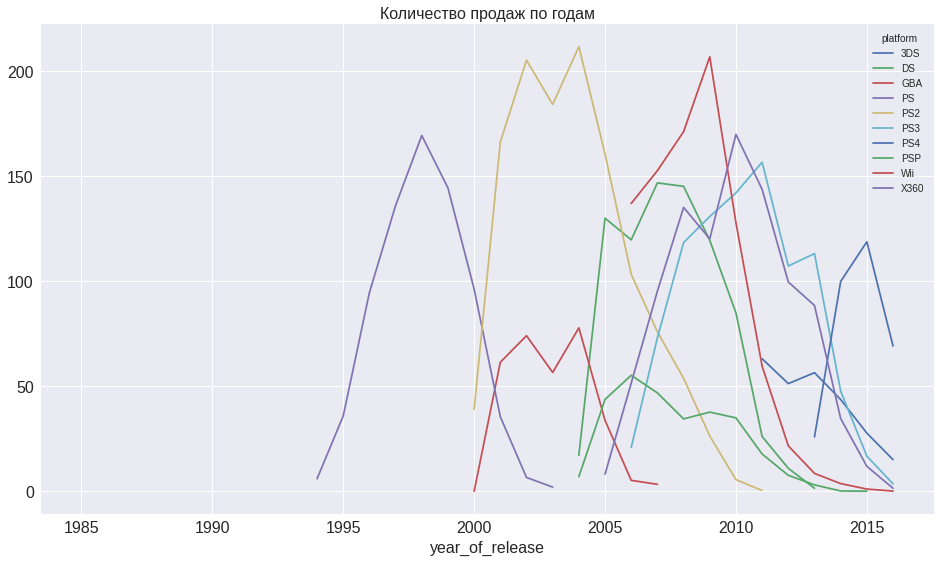

In [ ]:
(
data.query('platform in @top_10') # отфильтруем по компаниям
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(
        grid=True,
        title='Количество продаж по годам',
        figsize=(16,9),
        xlabel='Год релиза',
        ylabel='Количество')
); # выведем на экран графики продаж

На графике видно, что пик старта топовых компания начался 2004 - 2005 годах. При этом можно проследить, что средний срок жизни компаний 5-7 лет, при этом есть и компании, которые на рынке 10 лет. Можно отметить, что старыми топовыми компаниями можно считать PS, GBA, PS2 их период активности закончился около 2005 года.

#### Определение актуального периода и прогноз данных.

Ранее оценили, что средний срок жизни компании 5-7 лет. У нас в датасете данные крайнее за 2016 год. Отсюда следует, что возьмем данные актуальные с 2012 по 2016 год.

In [ ]:
(
data.query('year_of_release > 2011')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
) # Выведим топ 10 платформ по общему заработку за актуальный период.

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


In [ ]:
top_10_new = (
    data.query('year_of_release > 2011')
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .head(10)
    .index
    .unique()
)
# возьмем названия компаний
top_10_new

Index(['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS'], dtype='object', name='platform')

In [ ]:
# data_filter = data.query('platform in @top_10_new') # отфильтруем наш датасет по этим компаниям
# data_filter

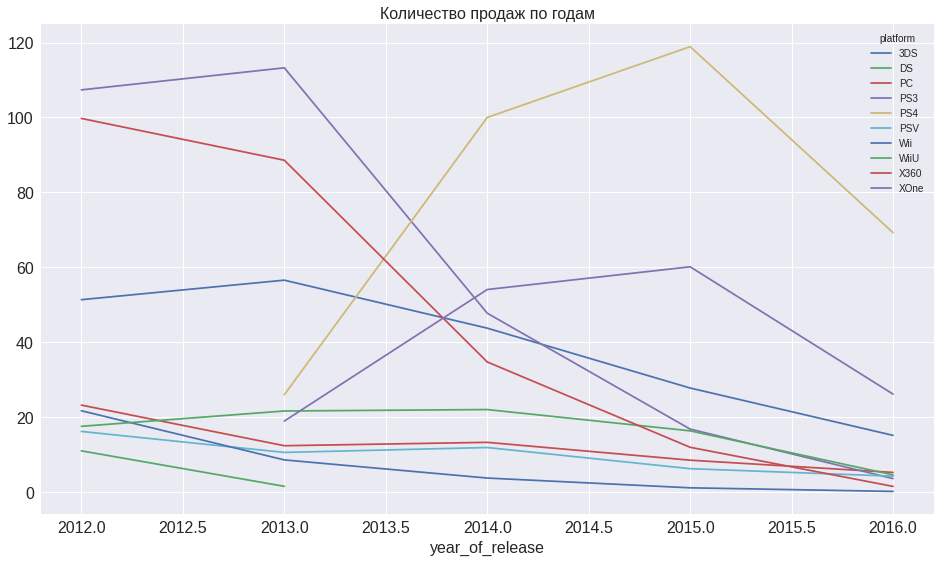

In [ ]:
(
data.query('(platform in @top_10_new) & (year_of_release > 2011)') # отфильтруем наш датасет по этим компаниям
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(
        grid=True,
        title='Количество продаж по годам',
        figsize=(16,9),
        xlabel='Год релиза',
        ylabel='Количество')
); # выведем на экран графики продаж

На графике видно, что у большинство компаний за период 2012-2016 годов наблюдается спад продаж. Исключением можно выделить PS4 XОne, которые показывают лучший результат среди конкурентов за 2016 год.

Можно отметить, что последние 2 года наибольшие продажи у компаний PS4, XOne, 3DS.  У этих кампаний выручка выше по сравнению с другими. Остальные компании можно отнести к падающим, это 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'DS'

#### Построение ящика с усами по платформам

In [ ]:
data = data.query('year_of_release > 2013') # возьмем актуальный период за последние 3 года

<div class="alert alert-info"><b>
возьмем актуальный период за 3 года. Перезаписываем весь датасет с актуальным периодом
<b>
</div>

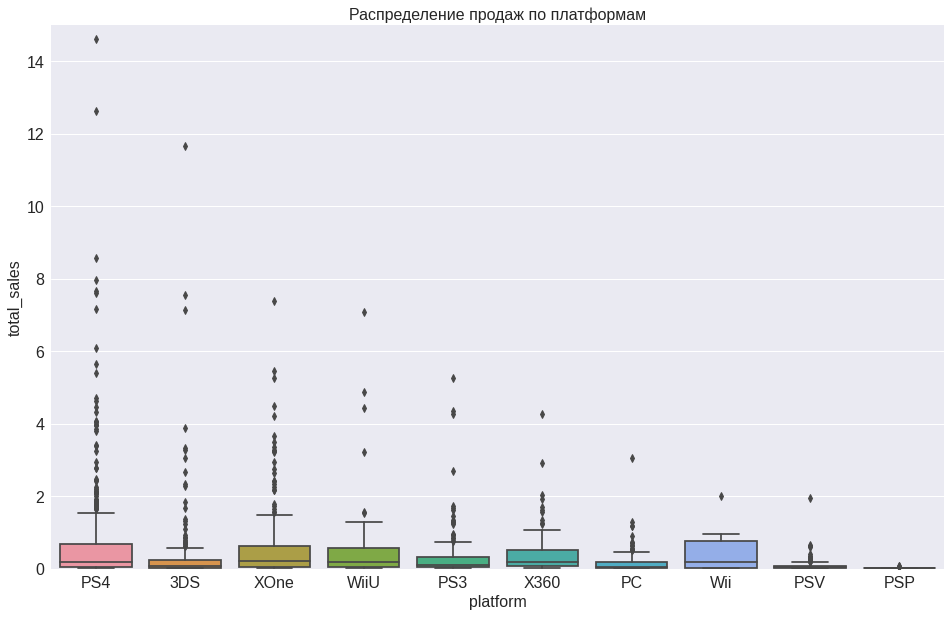

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='platform', y='total_sales', data = data)
plt.title('Распределение продаж по платформам') # Подпись всего графика
plt.ylim((0,15))  #для "отрезания"  графика неинформативной части
plt.show() # Достаточно много выбросов

In [ ]:
'''
for platform in top_10_new:
    print(platform)
    print(data[data['platform'] == platform]['total_sales'].quantile([0.01, .5, .99, .9976]));

 # сделаем срез данных по процентилям, которые высчитали.
 '''

"\nfor platform in top_10_new:\n    print(platform)\n    print(data[data['platform'] == platform]['total_sales'].quantile([0.01, .5, .99, .9976]));\n        \n # сделаем срез данных по процентилям, которые высчитали.\n "

In [ ]:
'''
for platform in top_10_new:
    percentile97 = np.percentile(data_filter[data_filter['platform'] == platform]['total_sales'].dropna(), 97) # 97% процентиль
    data_filter = data_filter.drop(data_filter.loc[(data_filter['platform'] == platform) &  (data_filter['total_sales'] > percentile97)].index)
'''

"\nfor platform in top_10_new:\n    percentile97 = np.percentile(data_filter[data_filter['platform'] == platform]['total_sales'].dropna(), 97) # 97% процентиль\n    data_filter = data_filter.drop(data_filter.loc[(data_filter['platform'] == platform) &  (data_filter['total_sales'] > percentile97)].index)\n"

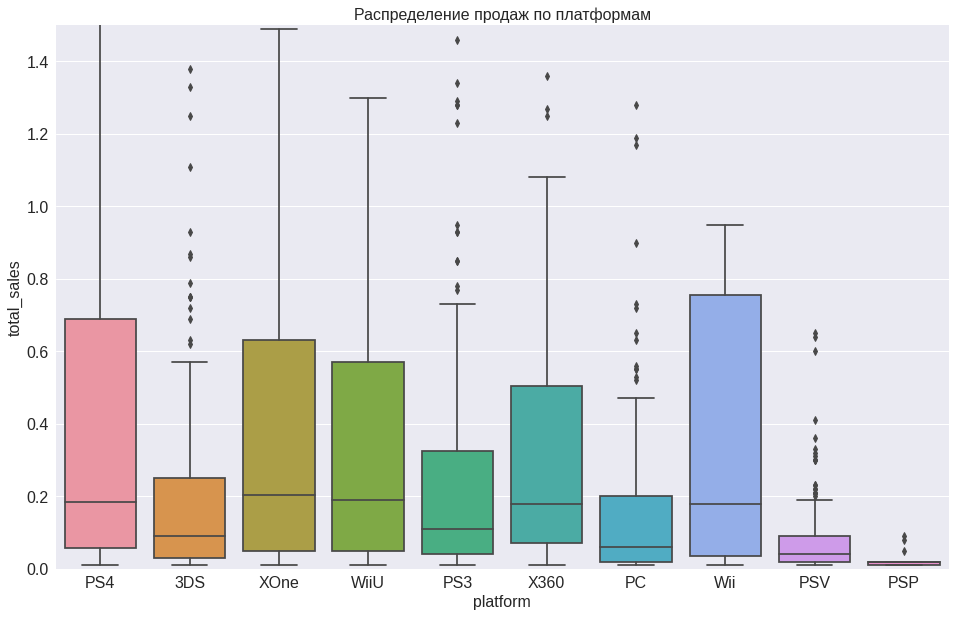

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='platform', y='total_sales', data = data)
plt.title('Распределение продаж по платформам') # Подпись всего графика
plt.ylim((0,1.5))  #для "отрезания"  графика неинформативной части
plt.show() #

С помощью ящика с усами можно определить медиану для каждой платформы. Исходя из графика в лидерах XOne, WiiU, X360, PS4, Wii.

#### Влияние на продажи платформы PS4 отзывов пользователей и критиков

In [ ]:
data.loc[data['user_score'] > -1, 'user_score'] = data['user_score'] * 10 # домножим оценку на 10

In [ ]:
test = data[(data['user_score'] > -1) & (data['critic_score'] > 0)]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             704 non-null    object 
 1   platform         704 non-null    object 
 2   year_of_release  704 non-null    int64  
 3   genre            704 non-null    object 
 4   na_sales         704 non-null    float64
 5   eu_sales         704 non-null    float64
 6   jp_sales         704 non-null    float64
 7   other_sales      704 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       704 non-null    float64
 10  rating           704 non-null    object 
 11  total_sales      704 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 71.5+ KB


In [ ]:
test[['user_score', 'critic_score', 'total_sales']].corr() # смотрим корреляцию между столбцами

,user_score,critic_score,total_sales
user_score,1.000000,0.504460,0.005202
critic_score,0.504460,1.000000,0.325363
total_sales,0.005202,0.325363,1.000000


In [ ]:
test['user_score'].corr(test['critic_score']) # корреляция до 0,5: Слабая корреляция

0.5044604031800758

In [ ]:
test['user_score'].corr(test['total_sales']) # корреляция до 0,2: Очень слабая корреляция

0.005202258360087502

In [ ]:
test['critic_score'].corr(test['total_sales']) # корреляция до 0,5: Слабая корреляция

0.3253626120075887

Исходя из данных корреляция между оценками слабая, посмотрим на графиках как и корреляция между оценками критиков и количеством продаж. Корреляция между оценкой пользователей и количеством продаж очень слабая.

In [ ]:
# pd.plotting.scatter_matrix(data[['user_score', 'critic_score', 'total_sales']], figsize=(16, 16)); # строим диаграммы взаимосвязи

Графики подтверждают выводы сделанные ранее. Видим взаимосвязь между оценками пользователей и критиков.

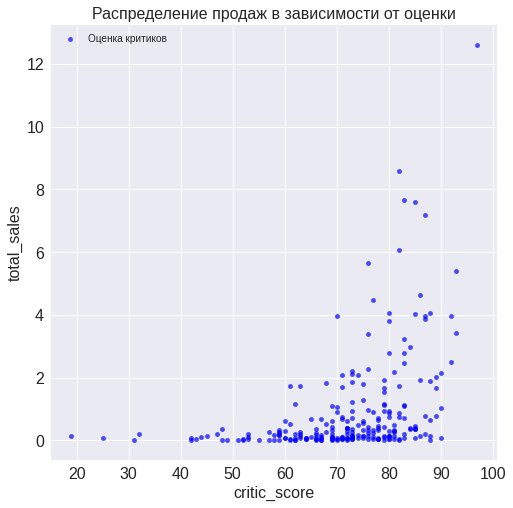

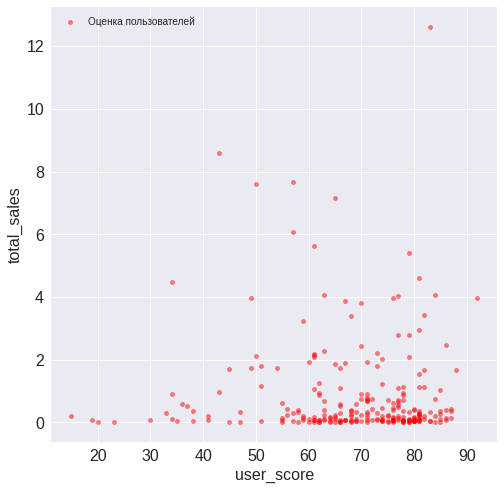

In [ ]:
(
data
    .query('(platform == "PS4") & (critic_score > 0)')
    .plot(x='critic_score', y='total_sales', kind='scatter',  c='b', label='Оценка критиков',alpha= 0.7,figsize=(8, 8))
)
plt.title('Распределение продаж в зависимости от оценки');
ax = (data
    .query('(platform == "PS4") & (user_score > -1)')
    .plot(x='user_score', y='total_sales', kind='scatter', c='r', label='Оценка пользователей',alpha= 0.5,figsize=(8, 8))
)


In [ ]:
test = data.query('platform == "PS4"')  # корреляция до 0,5: Слабая корреляция
test.query('critic_score > 0')['critic_score'].corr(test.query('critic_score > 0')['total_sales'])

0.40266141068104083

In [ ]:
test.query('user_score > -1')['user_score'].corr(test.query('user_score > -1')['total_sales']) # корреляция до 0,2: Очень слабая корреляция

-0.04013158947269736

In [ ]:
test = data.query('platform == "PS3"')  # корреляция до 0,5: Слабая корреляция
test.query('critic_score > 0')['critic_score'].corr(test.query('critic_score > 0')['total_sales'])

0.44657460493190704

In [ ]:
test.query('user_score > -1')['user_score'].corr(test.query('user_score > -1')['total_sales']) # корреляция до 0,2: Очень слабая корреляция

-0.16676141347662102

In [ ]:
test = data.query('platform == "X360"') # до 0,7: Средняя корреляция
test.query('critic_score > 0')['critic_score'].corr(test.query('critic_score > 0')['total_sales'])

0.5257228356581523

In [ ]:
test.query('user_score > -1')['user_score'].corr(test.query('user_score > -1')['total_sales']) # корреляция до 0,2: Очень слабая корреляция

-0.13844457094566515

In [ ]:
test = data.query('platform == "3DS"')  # корреляция до 0,5: Слабая корреляция
test.query('critic_score > 0')['critic_score'].corr(test.query('critic_score > 0')['total_sales'])

0.314117492869051

In [ ]:
test.query('user_score > -1')['user_score'].corr(test.query('user_score > -1')['total_sales'])  # корреляция до 0,5: Слабая корреляция

0.21519327185270284

In [ ]:
platforms = ['PS4', 'PS3', 'X360', '3DS']
print('Корреляция по критикам и по пользователям')
for platform in platforms:
    test = data.query('platform == @platform')
    print(platform,
          test.query('critic_score > 0')['critic_score'].corr(test.query('critic_score > 0')['total_sales']),
          test.query('user_score > -1')['user_score'].corr(test.query('user_score > -1')['total_sales']))

Корреляция по критикам и по пользователям
PS4 0.40266141068104083 -0.04013158947269736
PS3 0.44657460493190704 -0.16676141347662102
X360 0.5257228356581523 -0.13844457094566515
3DS 0.314117492869051 0.21519327185270284


Если рассматривать корреляцию по платформам, то корреляция между оценками пользовател и продажами либо слабая либо очень слабая. При этом оценки критиков в случае разбития по платформам могут быть слабо коррелированы с продажами или среднее коррелированы (от 0,5 до 0,7: Средняя корреляция).

Выше изображен график зависимости продаж от оценки. Необходимо сказать, что большинство данных лежат в предал 2 млн. Также большинство игр получает оценка от пользователя выше 60. Так же, анализируя график можно заметить, что чем выше оценка тем разброс продаж больше. Это хорошо заметно начаная с оценки 60. Количество появления продаж свыше 2 млн чаще. Также можно отметить, что оценки критиков, выше оценки пользователей.

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

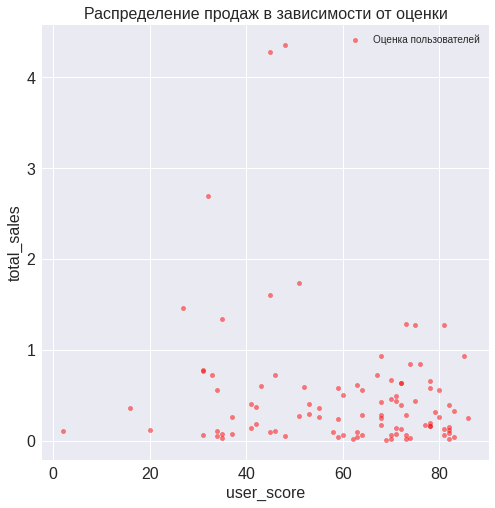

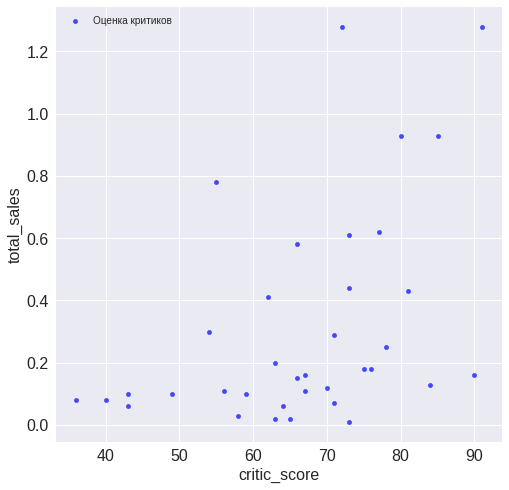

In [ ]:
#'PS4', 'PS3', 'X360', '3DS' проверим на других платформах

(data
    .query('(platform == "PS3") & (user_score > -1)')
    .plot(x='user_score', y='total_sales', kind='scatter', c='r', label='Оценка пользователей',alpha= 0.5,figsize=(8, 8))
)
plt.title('Распределение продаж в зависимости от оценки');
(
data
    .query('(platform == "PS3") & (critic_score > 0)')
    .plot(x='critic_score', y='total_sales', kind='scatter', c='b', label='Оценка критиков',alpha= 0.7, figsize=(8, 8))
)


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

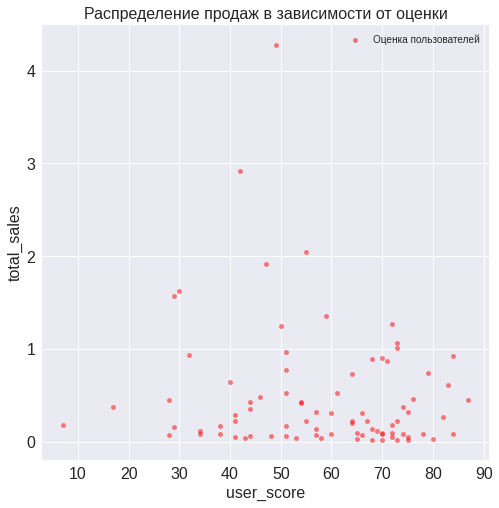

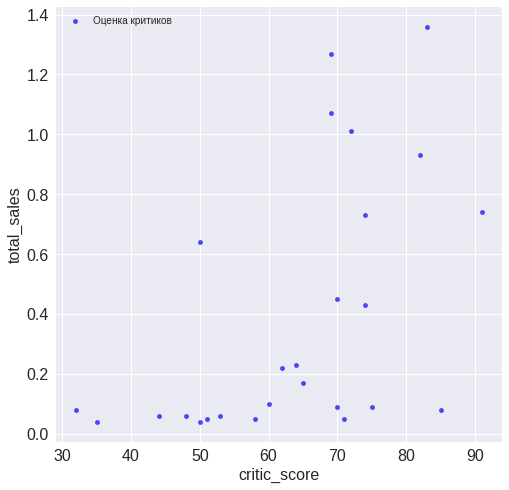

In [ ]:
(
    data
    .query('(platform == "X360") & (user_score > -1)')
    .plot(x='user_score', y='total_sales', kind='scatter', c='r', label='Оценка пользователей',alpha= 0.5,figsize=(8, 8))
)
plt.title('Распределение продаж в зависимости от оценки');
(
data
    .query('(platform == "X360") & (critic_score > 0)')
    .plot(x='critic_score', y='total_sales', kind='scatter', c='b', label='Оценка критиков',alpha= 0.7,figsize=(8, 8))
)


<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

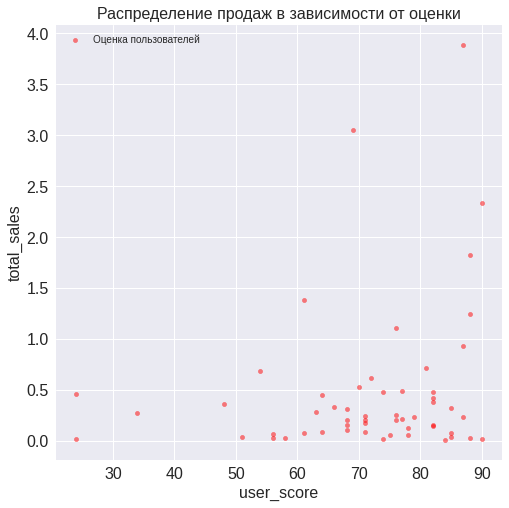

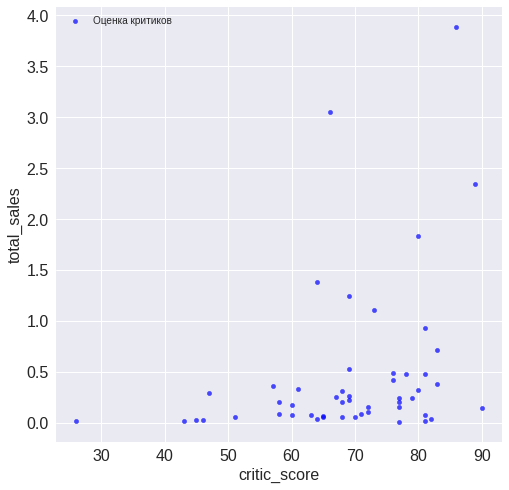

In [ ]:
(data
    .query('(platform == "3DS") & (user_score > -1)')
    .plot(x='user_score', y='total_sales', kind='scatter', c='r', label='Оценка пользователей',alpha= 0.5,figsize=(8, 8))
)
plt.title('Распределение продаж в зависимости от оценки');
(
data
    .query('(platform == "3DS") & (critic_score > 0)')
    .plot(x='critic_score', y='total_sales', kind='scatter', c='b', label='Оценка критиков',alpha= 0.7,figsize=(8, 8))
)


При сравнении графиков других платформ, можно отметить факт что оценки критиков выше оценки пользователей. Оценки критиков и пользователей слабо влияют на количество продаж.

#### Распределение игр по жанрам

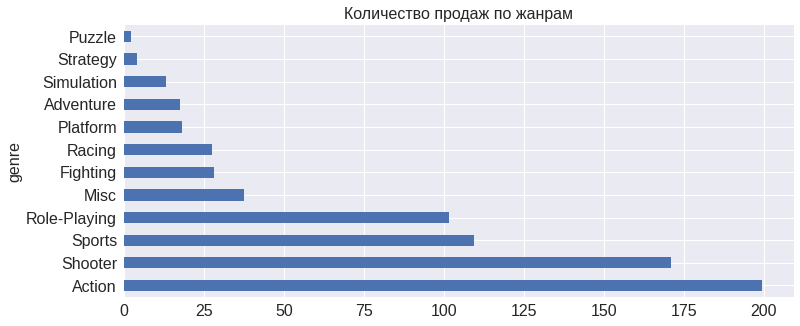

In [ ]:
(
data.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж по жанрам',
        legend = False,
        figsize=(12,5))
); # группируем по жанрам и посчитываем сумму.

На графике видим, что преобладает Action, Sports, Shooter по жанрам. Самые низкие продажи имеют жанры Strategy, Simulation, Puzzle. Есть предположение, что с развитием кибеспорта, а также прямых траснляций, пользователю интересно смотреть динамичную, быструю, острую игру. Что хорошо описывает первые три позиции.

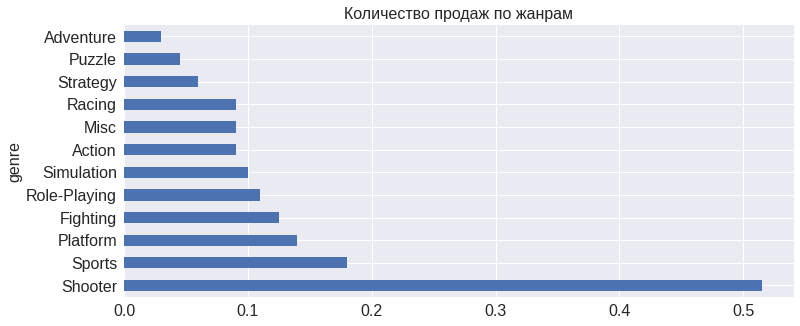

In [ ]:
(
data.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж по жанрам',
        legend = False,
        figsize=(12,5))
); # группируем по жанрам и median.

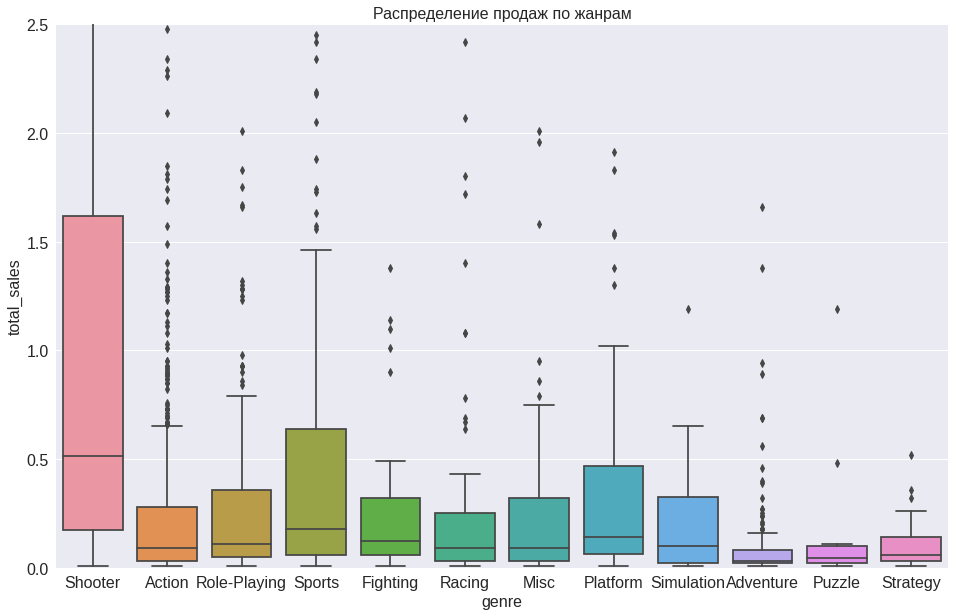

In [ ]:
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x='genre', y='total_sales', data = data)
plt.title('Распределение продаж по жанрам') # Подпись всего графика
plt.ylim((0,2.5))  #для "отрезания"  графика неинформативной части
plt.show() #

<div class="alert alert-info"><b>
добавил график по медианным значениям.
    
<b>
    
    Список лидеров изменился, отлично себя показали шутеры, спорт и платформы и файтеры. топ сам низких по продажам также подвергся изменениям, adventure занимает самый низ по средним продажам.
</div>

### Составьте портрет пользователя каждого региона

#### Самые популярные платформы (топ-5).

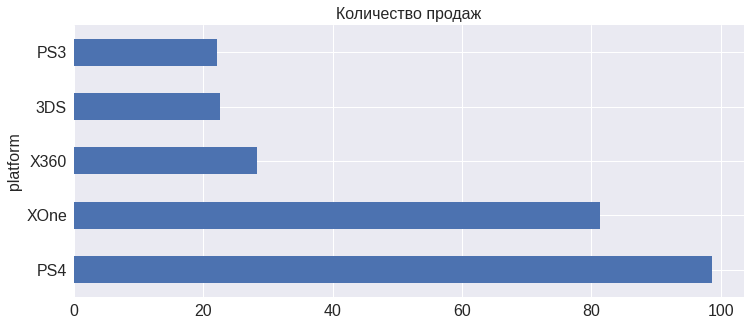

In [ ]:
(
data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
# берем топ 5 платформ, соотносим количество в американском регионе

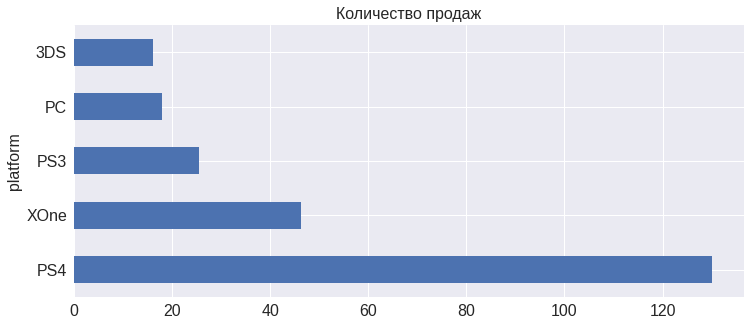

In [ ]:
(
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
# берем топ 5 платформ, соотносим количество в европейском регионе

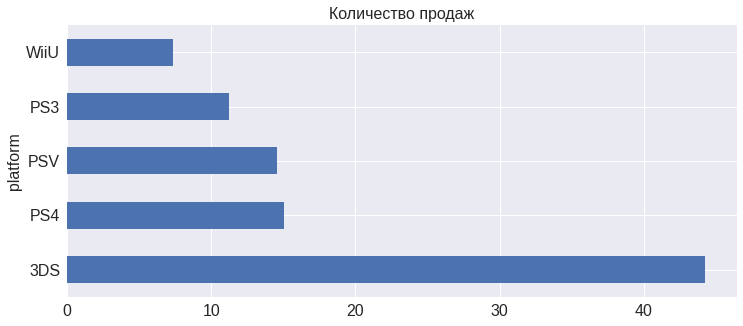

In [ ]:
(
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
# берем топ 5 платформ, соотносим количество в японском регионе

На всех трех графиках видим, лидеров продаж. Далее соотнесем их доли. Стоит отметить, что в японском регионе ситуация с лидерами сильно изменилась. Восток дело тонкое.

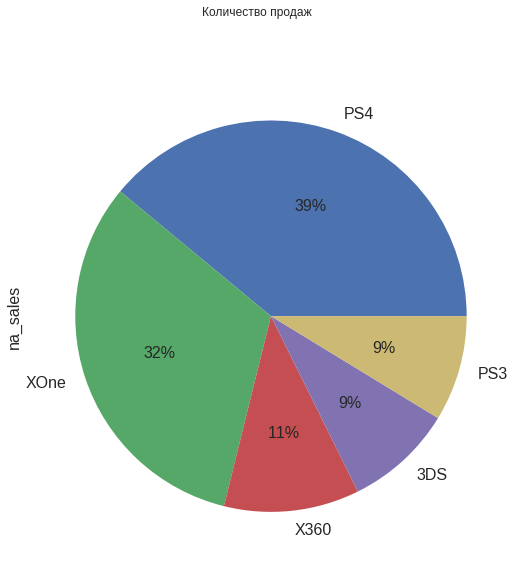

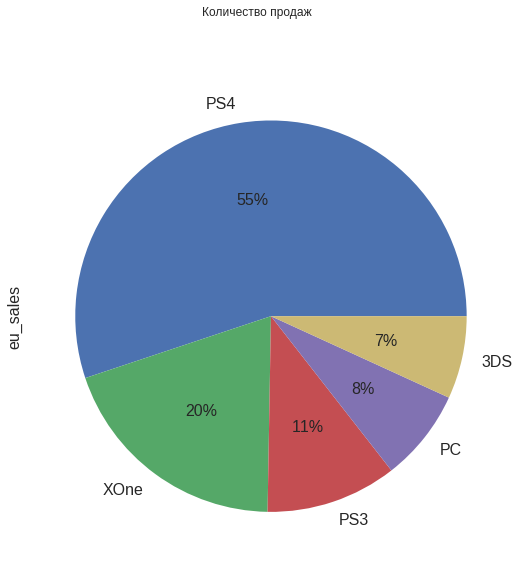

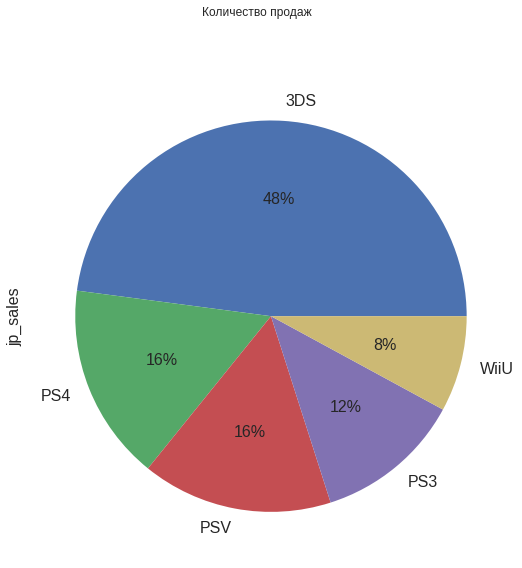

In [ ]:
(
data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(
        kind='pie',
        grid=True,
        title='Количество продаж',
        fontsize=16,
        legend = False,
        autopct='%1.f%%',
        figsize=(16,9),
        subplots=True)
);
(
data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(
        kind='pie',
        grid=True,
        title='Количество продаж',
        autopct='%1.f%%',
        legend = False,
        figsize=(16,9),
        fontsize=16,
        subplots=True)
);
(
data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(
        kind='pie',
        grid=True,
        title='Количество продаж',
        legend = False,
        autopct='%1.f%%',
        figsize=(16,9),
        fontsize=16,
        subplots=True)
);

# берем топ 5 платформ, соотносим доли относительно друг друга.

По регионам серевоамериканский: PS4, Xone, X360, PS3, 3DS.

европейский: PS4, PS3, Xone, PC, 3DS.

японский: 3DS, PS4, PSV, PS3, Wiiu.

Видим что, лидирует платформа PS4, и различие между американским и европейским регионом всего лишь в одной позиции. А вот в японском регионе лидеры сменились и к ним добавились PSV, PS3, Wiiu. Назревает вывод, что не все так однозначно и по вкусам регионы различаются значительно.

#### Самые популярные жанры (топ-5).

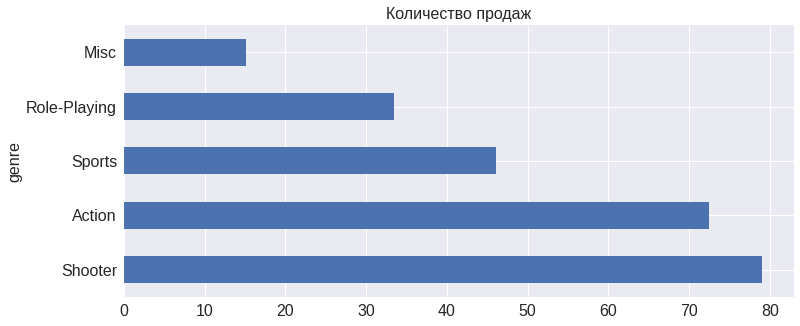

In [ ]:
(
data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
# топ 5 по жанрам в американском регионе

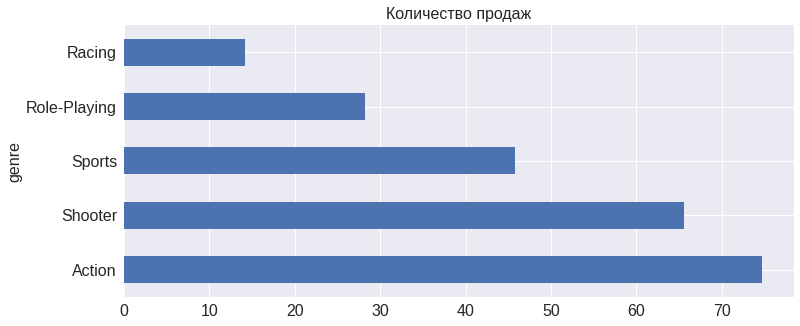

In [ ]:
(
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
# топ 5 по жанрам в европейском регионе

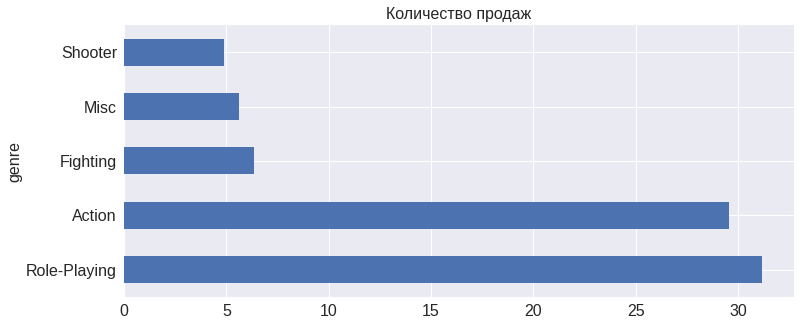

In [ ]:
(
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
# топ 5 по жанрам в японском регионе

Можно отметить, что ситуация аналогичная с предыдущей.

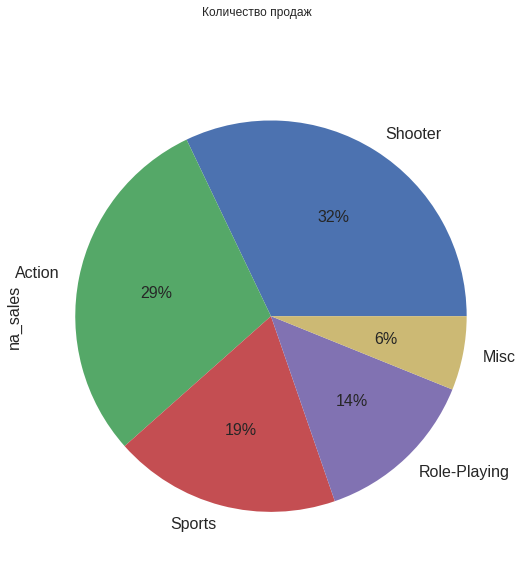

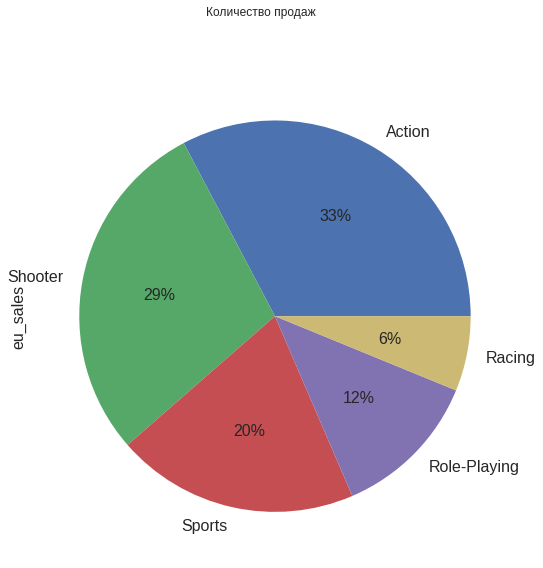

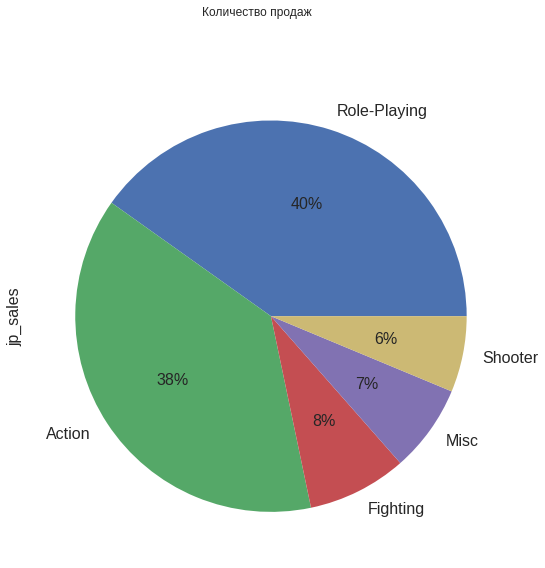

In [ ]:
(
data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head()
    .plot(
        kind='pie',
        grid=True,
        title='Количество продаж',
        fontsize=16,
        legend = False,
        autopct='%1.f%%',
        figsize=(16,9),
        subplots=True)
);
(
data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head()
    .plot(
        kind='pie',
        grid=True,
        title='Количество продаж',
        fontsize=16,
        legend = False,
        autopct='%1.f%%',
        figsize=(16,9),
        subplots=True)
);
(
data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head()
    .plot(
        kind='pie',
        grid=True,
        title='Количество продаж',
        fontsize=16,
        legend = False,
        autopct='%1.f%%',
        figsize=(16,9),
        subplots=True)
);
# отрисосвываем графики

По регионам серевоамериканский: Action, Sports, Shooter, Role-Playing, Misc.

европейский: Action, Sports, Shooter, Racing, Role-Playing.

японский: Role-Playing, Action, Fighting, Shooter, Misc.

Видим что, лидирует Action и Shooter, и различие между американским и европейским регионом всего лишь в одной позиции. А вот в японском регионе лидеры сменились Role-Playing с большим отрывом. Что наводит на вывод, вкусы жанров в японском регионе отличается от других.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

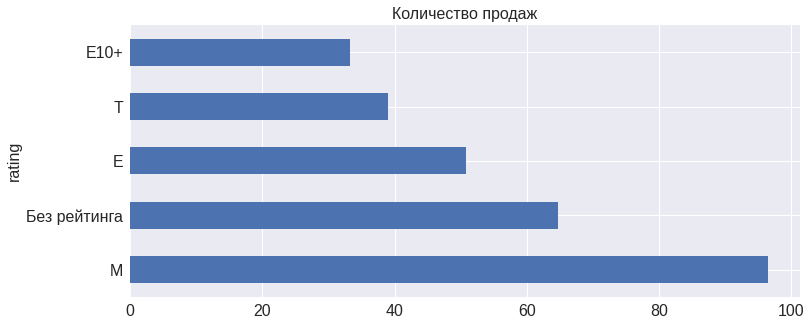

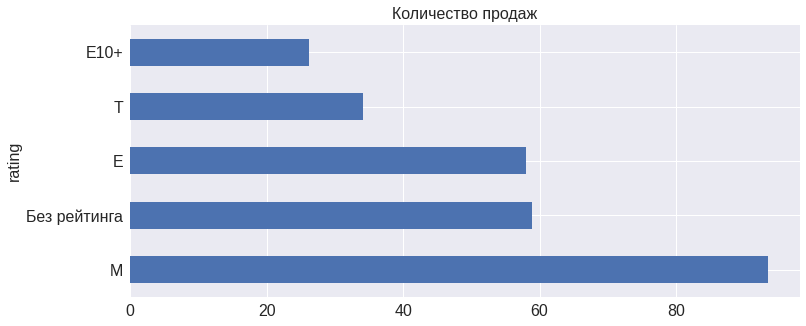

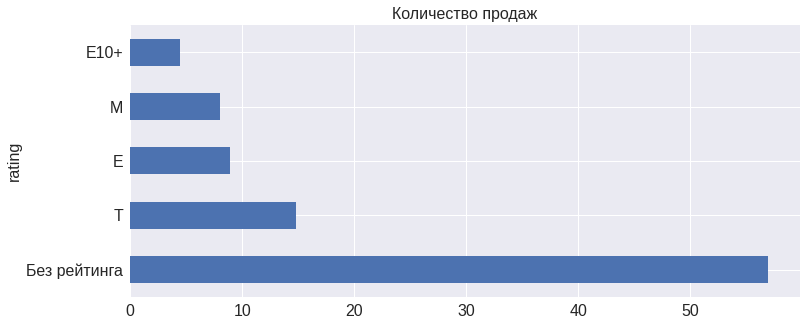

In [ ]:
(
data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
(
data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5),
        )
);
(
data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .plot(
        kind='barh',
        grid=True,
        title='Количество продаж',
        legend = False,
        figsize=(12,5))
);
# Выведем количество продаж по регионам разделенные по рейтингу

Лидер у нас безизменный Е, а вот далее ситуация принимает оборот прошлых наблюдений. В японском регионе не все так однозначно. Правда стоит отметить, что лидеры остаются Е, Т, М, Е10+.

Отмечу, что в японском регионе нетолько поменялись позиции в лидерах, но и соотношение между ними. Так заметно, что жанры Е, Т домируют над остальными. Стоит также, отметить, что количество продаж категории Без рейтинга в Японии слишком велико. Тут не надо забывать, что количество продаж в японском регионе меньше в разы по сравнению с американским и европейским регионами. Возможно, что причина в языковом барьере и на этапе сбора информации произошла ошибка.

Отсюда вывод, что да, рейтинг влияет на количество продаж.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Средний пользовательский рейтинг (user_score) платформы "Xbox One" = среднему рейтингу платформы "PC"
H_a: Средний пользовательский рейтинг (user_score) платформы "Xbox One" ≠ среднему рейтингу платформы "PC"
alpha = 0.05
```

In [ ]:
results = st.ttest_ind(data[(data['platform'] =='XOne') & (data['user_score'] > -1)]['user_score'],
data[(data['platform'] =='PC') & (data['user_score'] > -1)]['user_score'],equal_var=False) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha:
 print("Отвергаем нулевую гипотезу")
else:
 print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

0.11601398086668918
Не получилось отвергнуть нулевую гипотезу


Из результатов следует, что средний рейтинги не равны по платформам.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средний пользовательский рейтинг (user_score) жанров "Action" = среднему рейтингу жанра "Sports"
H_a: Средний пользовательский рейтинг (user_score) жанров "Xbox One" ≠ среднему рейтингу жанра "Sports"
alpha = 0.05
```

In [ ]:
results = st.ttest_ind(data[(data['genre'] =='Action') & (data['user_score'] > -1)]['user_score'],
data[(data['genre'] =='Sports') & (data['user_score'] > -1)]['user_score'], equal_var=False) # results = вызов метода для проверки гипотезы

alpha = 0.05 # alpha = задайте значение уровня значимости

print(results.pvalue) # вывод значения p-value на экран
if results.pvalue < alpha:
 print("Отвергаем нулевую гипотезу")
else:
 print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

1.182555038264477e-14
Отвергаем нулевую гипотезу


Из результатов следует, что средний рейтинги не равны по жанрам.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяли
метод scipy.stats.ttest_ind(). Другие методы не подходят, у нас не сравнение с каким-то числом и не результаты после изменения.
Также, так как дисперсии не равны, задаем параметр equal_var=False.

### Выводы:

 ```
 - Мы проанализировали рынок игр. Интерес к индустрии произошел 2000 годах, а дальше 2006 произошел пик по выходу игр в год.
 - Историческими лидерами по количеству продаж являются PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS. А также средний срок жизни платформы в пределах 5-7 лет.
 - Последние 2 года наибольшие продажи у компаний PS4, XOne, 3DS, стоит обратить внимание на данные компании.
 - Если ориентироваться на медиану общих продаж можно выделить данные компании XOne, WiiU, X360, PS4, Wii, показатель самый высокий.
 - К сожалению, рейтинги критиков и пользователей не влияют на продажи игр. Но взаимосвязь между критериями очень сильная.
 - По жанрам можно отметить, что Sports, Shooter находятся в лидерах и стоит при выборе игры руководствоваться данными жанрами. Самые низкие продажи имеют жанры Strategy, Adventure, Puzzle.
 - Был составлен портрет пользователя по регионам. Стоит отметить, что различия между американским и европейским регионами незначительные. А вот японский регион требует отдельного подхода.
 - Обе гипотезы о равенстве рейтингов не подвердились.
  ```